# Fakebusters: Data description and Pipeline

## Motivation

The goal of our project is to perform person identification in videos, in a way that is robust to deepfake forgeries, in particular those that rely on face swapping techniques (See:) . Existing speaker identification techniques of video rely heavily either on facial recognition of static image data or audio signal processing . Recent research has demostrated the efficacy of deep learning approaches to create high quality forgeries of both facial features (https://www.youtube.com/watch?v=O7JOD-qytb8) and voices (http://talkobamato.me), suggesting the need for an approach that does not rely exclusively on this data to perform person identificaction. This notebook suggest and alternative approach, presenting a dataset and a data pipeline design that can be used to explore new models for this task. 

## Hypothesis

We believe that the 'biometric' signal of facial expressions can be used in the task of speaker identification. Given that face swapping techniques can forge facial features and speech but the facial expressions are not the ones of the real person but of the 'actor' that is wearing their 'mask', a classifier that relies on this signal will be resistant to these kind of fakes. 

## Data 

To perform this task we've downloaded the VoxCeleb2 Dataset (330 GB) that includes <b>1,092,009</b> close-up talking video clips ('utterances') from <b>5,994</b> celebrities. A summary of the Data is presented below:

In [135]:
%load_ext autoreload
%autoreload 2
%pylab inline
import numpy as np
import pandas as pd
import os
import codecs

Populating the interactive namespace from numpy and matplotlib


/Users/dsrincon/anaconda/envs/dlnd/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['gray', 'shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [136]:
#--------------------------------CREATE DATAFRAME WITH USER IDENTITIES-----------------------------------

# Create Dataframe from CSV
identity_path='/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/masters_usa/MIMS/2019-I/cs282_deep_neural_networks/assignments/project/pre_processing/identity_meta.csv'
identity_df=pd.read_csv(identity_path)

# Rename Dataframe
identity_df.rename(index=str, columns={'Class_ID': 'user_id'},inplace=True)
identity_df['user_id']=identity_df['user_id'].str.replace('n0','id')
identity_df[' Name' ]=identity_df[' Name'].str.replace('"','').str.replace('_',' ')



In [137]:
#identity_df.head(17)
try:
    name_i=identity_df.loc[identity_df['user_id']=='id02181',' Name'].values[0][1:]
except IndexError:
    name_i='N/A'
print(name_i)

N/A


In [138]:
#-----------------------------CREATE DATAFRAME WITH ALL CLIPS------------------------------------------


#----VARIABLE AND CONSTANT INITIALIZATION 

# Path to directory containing text files with information about dataset
path='/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/masters_usa/MIMS/2019-I/cs282_deep_neural_networks/assignments/project/test_data/txt'
fps=25 # Constant to detMermine Frames per second on each video

# Define empty lists
user_id=[]
name=[]
video_id=[]
utterance_no=[]
no_frames=[]
file_path=[]
original_video=[]
duration=[]
name=[]


# Define dictionary to create DataFrame
dic={'user_id':'','video_id':'','utterance_no':'','no_frames':'','file_path':'','original_video':'','duration':'','name':''}


# ----EXTRACT FILES IN SUB-DIRECTORIES
for subdir, dirs, files in os.walk(path):
  
    for file in files:

       
        # ----GET FILE INFORMATION FOR EACH FILE (CLIP)
        
        # Get file path and split into directories
        file_path_i=os.path.join(subdir, file)
        path_array=file_path_i.split('/') 
        
        
        # Get directory names that correspond to utterance (clip), video and user
        utterance_no_i=path_array[-1][:-4] # -4 is to eliminate .txt from string
        video_id_i=path_array[-2]
        user_id_i=path_array[-3]
        if user_id_i[0]=='i': # Only store files that corresponde to clips and directory starts with 'id':
        
            # Put together original URL for video
            original_video_i='https://www.youtube.com/watch?v='+video_id_i
        
            # For each clip get number of frames by counting lines in .txt that describes clip
            with codecs.open(file_path_i, 'r', encoding='utf-8',errors='ignore') as f:
                for i, l in enumerate(f):
                
                    pass
            no_lines=i-6 #Subtracting the lines in the top of the file
            no_frames_i=no_lines
        
            # Calculate duration
            duration_i=no_frames_i/fps
        
            #Find name
            try:
                name_i=identity_df.loc[identity_df['user_id']==user_id_i,' Name'].values[0][1:]
        
            except IndexError:
                name_i='N/A'
        
    
            # ----UPDATE LISTS WITH FILE (CLIP) INFORMATION
            user_id.append(user_id_i)
            video_id.append(video_id_i)
            utterance_no.append(utterance_no_i)
            file_path.append(file_path_i)
            original_video.append(original_video_i)
            no_frames.append(no_frames_i)
            duration.append(duration_i)  
            name.append(name_i)
        
        
# ----UPDATE DICTIONARY WITH POPULATED LISTS (remove first row which is root folder)
dic['user_id']=user_id
dic['video_id']=video_id
dic['utterance_no']=utterance_no
dic['no_frames']=no_frames
dic['file_path']=file_path
dic['original_video']=original_video
dic['duration']=duration
dic['name']=name

#----CREATE DATAFRAME USING DICTIONARY
clips_df=pd.DataFrame(data=dic)
   


### **Clips Detail**

In [139]:

clips_df.head()


,duration,file_path,name,no_frames,original_video,user_id,utterance_no,video_id
0,5.12,/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/...,Song Neung-han,128,https://www.youtube.com/watch?v=msudF6HwuuI,id08149,00046,msudF6HwuuI
1,7.08,/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/...,Song Neung-han,177,https://www.youtube.com/watch?v=o0Zdr9Jla7U,id08149,00047,o0Zdr9Jla7U
2,4.52,/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/...,Song Neung-han,113,https://www.youtube.com/watch?v=o0Zdr9Jla7U,id08149,00048,o0Zdr9Jla7U
3,5.16,/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/...,Song Neung-han,129,https://www.youtube.com/watch?v=o0Zdr9Jla7U,id08149,00049,o0Zdr9Jla7U
4,4.04,/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/...,Song Neung-han,101,https://www.youtube.com/watch?v=vxBFGKGXSFA,id08149,00059,vxBFGKGXSFA


### User Summary

In [140]:
user_sum=clips_df[['user_id','name','video_id','utterance_no','duration']].groupby(['user_id','name']).agg({'video_id':'nunique','utterance_no':'count','duration':'mean'}).reset_index()
user_sum=user_sum.rename(columns={'video_id':'no_videos','utterance_no':'no_clips','duration':'average_duration'})
user_sum.head()

,user_id,name,no_videos,no_clips,average_duration
0,id00017,Aaron Rodgers,32,183,6.956940
1,id00061,Adam Rodríguez,41,288,9.073750
2,id00081,Aditya Roy Kapur,42,309,6.335534
3,id00154,Ajay Devgan,20,188,6.009149
4,id00419,Amy Adams,72,500,8.042000


### Dataset Summary

In [141]:
print('Total number of Celebrities: {:,}'.format(user_sum[['name']].count()[0]))
print('Total number of videos: {:,}'.format(user_sum[['no_videos']].sum()[0]))
print('Total number of clips: {:,}'.format(user_sum[['no_clips']].sum()[0]))
print('Average duration of clip (seconds): {:.2f}'.format(user_sum[['average_duration']].mean()[0]))
print('Aggregate duration of videos (seconds): {:,}'.format(int(clips_df[['duration']].sum()[0])))

#dataset_sum=clips_df[['user_id',me','video_id','utterance_no','duration']].agg({'user_id':'count','video_id':'nunique','utterance_no':'count','duration':'mean'})

Total number of Celebrities: 118
Total number of videos: 4,911
Total number of clips: 36,237
Average duration of clip (seconds): 7.73
Aggregate duration of videos (seconds): 289,487


# Pipeline

This section describes the pipeline proposed to pre-process the data before feeding it into the various deeplearning architectures we'll be testing. It also tests this pipeline with a small batch of clips to evaluate performance and asses viability by estimating the time required to pre-proccess the whole dataset. The steps in the pipeline are as follows: 

1. Extracting frames form videos as static images
2. Calculate an **'expression image'** by averaging pixels in 'x' frames as one static image. (Given that facial expressions don't change every frame)
3. Extract Facial Landmarks (Using dlib's model)
4. Normalize facial Landmarks to control for rotations and further restrict the signal from the facial features
5. Calculate Gram matrix of facial landmarks given that a facial expresion can be encoded in terms of how every facial landmark relates with all the others.
6. Save file(s) with the Gram matrix for every **expression image** on disc




In [117]:
%matplotlib inline
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from imutils import face_utils
import argparse
import imutils
import dlib
import cv2
import math

### 1. Utilities

### 1.1 Extract frames from video

In [8]:


"""
Function
--------
video_to_frame

Extract individual frames from a video using cv2 library: 
Reference: https://www.learnopencv.com/read-write-and-display-a-video-using-opencv-cpp-python/


Parameters
-----------
file_path : string
    The path where the video file is stored.
    

    
Returns
-------
frame : Numpy array
    Array of dimension (frame_width,frame_height,3), that contains all the frames in the video. 


"""


import cv2 #pip install opencv-python
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def video_to_frame(file_path):

    # Create a VideoCapture object and read from input file
    # If the input is the camera, pass 0 instead of the video file name
    cap = cv2.VideoCapture(file_path)
 
    # Check if camera opened successfully
    if (cap.isOpened()== False): 
      print("Error opening video stream or file")

    # Read until video is completed
    frames=[] # Initialize list to store frames
    while(cap.isOpened()):
      #Capture frame-by-frame
        ret, frame = cap.read()
    
        if ret == True: # Add frame to list
            frames.append(frame)

            # Break the loop when there are no more frames
        else: 
            break
 
    # When everything done, release the video capture object
    cap.release()
    frames=np.array(frames)
    
    return frames

Video has 225 frames each of shape (224, 224, 3)
Example frame 169


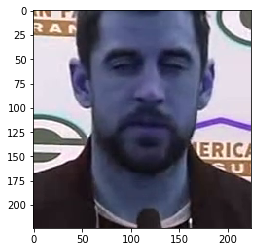

In [33]:
# TEST video_to_frame

file_path='/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/masters_usa/MIMS/2019-I/cs282_deep_neural_networks/assignments/project/test_data/mp4/id00017/7t6lfzvVaTM/00003.mp4'

frames=video_to_frame(file_path)
shape=frames.shape
no_frames=shape[0]
frame_size=shape[1:]

print('Video has {} frames each of shape {}'.format(no_frames,frame_size))

random_frame=np.random.randint(0,frames.shape[0])
print ('Example frame {}'.format(random_frame))
plt.imshow(frames[random_frame])
plt.show()



### 1.2 Summarize expressions (average frames)

In [63]:
"""
Function
--------
average_frames

Takes an array that has all the frames in a video and averages out 'expression_lenght' consecutive frames: 
Reference: https://www.learnopencv.com/read-write-and-display-a-video-using-opencv-cpp-python/


Parameters
-----------
video : Numpy array
    The video to be transformed as an array containing frames.
expression_length: int
    The number of consecutive frames that will be averaged out to create an expression
    

    
Returns
-------
video : Numpy array
    Video in 'summarized' format where each frame is an expression (average of frames)


"""

def summarize_expressions(video,expression_length):
    
    current_frames=video.shape[0]
    new_frames=current_frames//expression_length
    new_video=[]
    i=0
    
    
    while i<current_frames:
        frame_i=[]
        for j in range(expression_length):
            if(i+j>=current_frames):
                break
            else:
                frame_i.append(video[i+j])
                print
                
        
    
        #frame_i=np.array(np.around(frame_i/expression_length),dtype=np.uint8)
        frame_i=np.array(frame_i)
        frame_i=np.array(np.mean(frame_i,axis=0),dtype=np.uint8) # This double wrapping is need for matplotlib to render image correctly
        new_video.append(frame_i)
        i+=j+1
    
    
    new_video=np.array(new_video)
    
    return new_video


Input video is of size:(225, 224, 224, 3)
Summary video is of size:(75, 224, 224, 3)

First frame from summarized video summarizing 3 frames


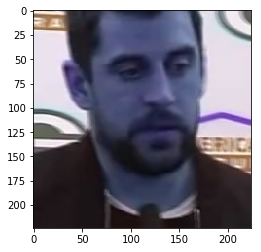

First 3 frames from original video


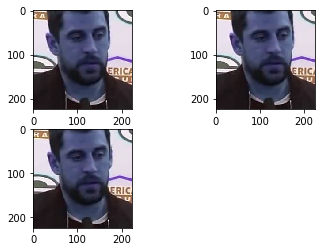

In [101]:
 # TEST summarize_expressions
    
summary_frames=3    
expression_video=summarize_expressions(frames,summary_frames)  

# Print sizes of original and summarized video
print('Input video is of size:{}'.format(frames.shape))
print('Summary video is of size:{}'.format(expression_video.shape))

# Show summary face

print('\nFirst frame from summarized video summarizing {} frames'.format(summary_frames))
fig,ax=plt.subplots()
ax.imshow(expression_video[0])
plt.show()

# Show original images

print('First {} frames from original video'.format(summary_frames))
for i in range(1,summary_frames+1):
    
    plt.subplot(2,math.ceil(summary_frames/2),i)
    plt.imshow(frames[i-1])
    #plt.show()
    
    
    

### 1.3 Extract Facial Landmarks

In [110]:


"""
Function
--------
calculate_landmarks

Takes video array (frame by frame) of shape (no_frames,frame_width,frame_height,color_channels) and creates an array with 
facial landmarks for each array. 
Reference: https://www.pyimagesearch.com/2017/04/03/facial-landmarks-dlib-opencv-python/


Parameters
-----------
video : Numpy array
    video array (frame by frame) of shape (no_frames,frame_width,frame_height,color_channels)


    
Returns
-------
landmarks : Numpy array
    Array that contains (x,y) coordinates for the facial features in each frame of the video


"""


def calculate_landmarks(video):
    
    landmarks=[]

    for image in video:

        predictor_path="facial-landmarks/shape_predictor_68_face_landmarks.dat"
        # initialize dlib's face detector (HOG-based) and then create
        # the facial landmark predictor
        detector = dlib.get_frontal_face_detector()
        predictor = dlib.shape_predictor(predictor_path)

        # load the input image, resize it, and convert it to grayscale
        #image = cv2.imread(args["image"])

        image = imutils.resize(image, width=500)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # detect faces in the grayscale image
        rects = detector(gray, 1)
        shape=0

        # loop over the face detections
        for (i, rect) in enumerate(rects):
            # determine the facial landmarks for the face region, then
            # convert the facial landmark (x, y)-coordinates to a NumPy
            # array
            shape = predictor(gray, rect)
            shape = face_utils.shape_to_np(shape)
            landmarks.append(shape)
        
    landmarks=np.array(landmarks)    
        
    return landmarks

In [111]:
 # TEST calculate_landmarks
landmarks=calculate_landmarks(expression_video)

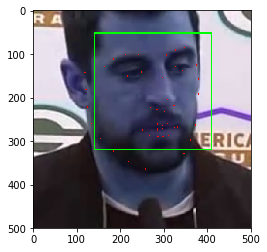

In [125]:
# Pick frame at random 
random_frame=np.random.randint(0,expression_video.shape[0])
image=expression_video[random_frame]
shape=landmarks[random_frame]

# Scale image
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize detector to draw rectangle
detector = dlib.get_frontal_face_detector()
rects = detector(gray, 1)

for (i, rect) in enumerate(rects):

    # Convert dlib's rectangle to a OpenCV-style bounding box [i.e., (x, y, w, h)], then draw the face bounding box
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Loop over the (x, y)-coordinates for the facial landmarks and draw them on the image
    for (x, y) in shape:
        cv2.circle(image, (x, y), 1, (255, 0, 0), -1)
    
    # Show the output image with the face detections + facial landmarks    
    imgplot = plt.imshow(image)
    plt.show()




### 1.4 Normalize Facial Landmarks

In [ ]:
# ---TODO: Make landmarks invariant to face structure and face rotation (or incorporate rotation separately) ---

### 1.5 Calculate Gram Matrix

Gram matrix can extract the relationship of every facial landmark in each frame with every other (analogous to a covariance matrix). This can help the model explicitly focus on the relationship (changes) between facial landmarks which constitute the essence of expressions, instead of only focusing on how the positions of the landmarks change. 

In [126]:

"""
Function
--------
gram_matrix

Takes landmarks array of shape (no_frames,frame_width,frame_height,color_channels) and calculates gram matrix for each 
of the frame landmarks in the array

Parameters
-----------
landmarks : Numpy array
   array of shape (no_frames,2) with facial landmarks (x-y-coordinates). 


Returns
-------
gram_array : Numpy array
    Array that contains gram matrix for facial landmarks in each frame of the video. 


"""

def gram_matrix(landmarks):
    gram_array=[]
    for landmark in landmarks:
        gram_i=np.dot(landmark,landmark.T)
        gram_array.append(gram_i)
    
    gram_array=np.array(gram_array)    

    
    return gram_array



In [131]:
# TEST gram_matrix
gram_array=gram_matrix(landmarks)
print('Landmar gram matrix is of shape: {}'.format(gram_array.shape))

Landmar gram matrix is of shape: (75, 68, 68)


### 1.6 Save to disc

In [134]:
#---TODO: Save to disc using http://www.h5py.org/---

### 2. Data extracting scripts

In [ ]:
# ---TODO: Depending on the data source used ---

## Performance estimation

The following script picks a random clip and tests the pre-processing steps, to calculate their performance. Potential improvements could be: 
- Downsample video quality
- Increase number of frames to average out
- Remove Gram matrix calculation

In [167]:
# Pick a random clip
sample=clips_df.sample()
sample

,duration,file_path,name,no_frames,original_video,user_id,utterance_no,video_id
4283,6.68,/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/...,Katie Taylor,167,https://www.youtube.com/watch?v=D1hj1LLibIg,id04657,00068,D1hj1LLibIg


In [178]:
# Get filepath and duration 
file_path=sample['file_path'].values[0]
file_path=file_path.replace("txt","mp4")
duration=sample['duration'].values[0]

# Run through pipeline

start=time.time()
# 1. Extract frames
frames=video_to_frame(file_path)

# 2. Sumarize expressions
summary_frames=8 # Consecutive frames to average
expression_video=summarize_expressions(frames,summary_frames) 

# 3. Exctract facial landmarks
landmarks=calculate_landmarks(expression_video)

# 4. Normalize
# TODO

# 5. Calculate Gram Matrix
gram_array=gram_matrix(landmarks)

# 6. Save to disc
# TODO

# Caculate processing time
end=time.time()
proc_time=end-start
proc_per_sec=proc_time/duration

print("Pre-processing time per second of video= {}".format(proc_per_sec))



Pre-processing time per second of video= 5.507037846628064


In [179]:
total_duration=int(clips_df[['duration']].sum()[0])
total_proc=proc_per_sec*total_duration
total_proc_days=total_proc/86400
print("At the rate above it would take {} days to pre-process test data in this machine".format(total_proc_days))

At the rate above it would take 18.451572512810397 days to pre-process test data in this machine
